In [1]:
%reset -f

import sys
import os
import csv
import pandas as pd
import ast
import ujson
import numpy as np
import matplotlib.pyplot as plt

from scripts.plotfunctions import ottrk_to_txt
from scripts.plotfunctions import plot_BBoxes
from scripts.plotfunctions import tracklength
from scripts.plotfunctions import plot_trajectory
from scripts.plotfunctions import plot_histogram

# dirpath = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/"
# filename = "OTCamera07_FR20_2023-09-19_17-00-00_Sued"

# dirpath = "Z:/04_Daten/GroundThruth/Leipzig/OTC19"
# filename = "OTCamera19_FR20_2023-05-24_07-15-00"

dirpath = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/test"
filename = "Testvideo_Luecke_FR20_2023-09-19_17-12-36_Sued"
fileending = '.ottrk'
filepath = os.path.join(dirpath, filename) + fileending

OTCdetections, metadata = ottrk_to_txt(filepath = filepath, export=False)
# plt.show(plot_BBoxes(OTCdetections, dirpath, framerate=20, trackid = 1089))

OTCdetections = OTCdetections.sort_values(by=['track-id', 'frame'])
OTCdetections = tracklength(OTCdetections)

width = metadata.loc['width', 'video']
height = metadata.loc['height', 'video']
box = [width, height]

del width, height

ottrk_to_txt...
tracklength...


[800, 600]


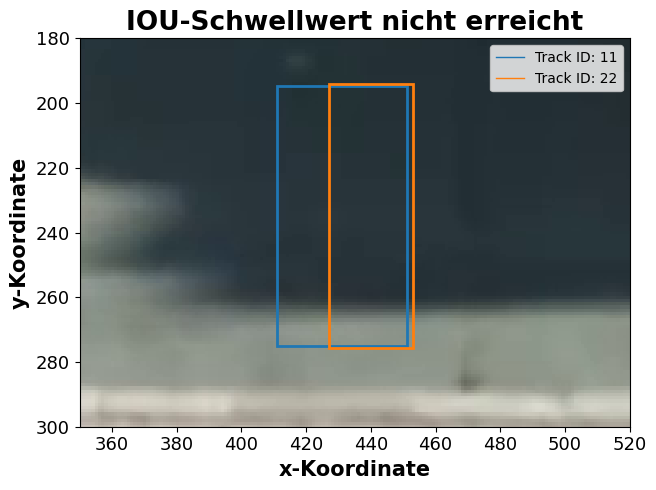

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

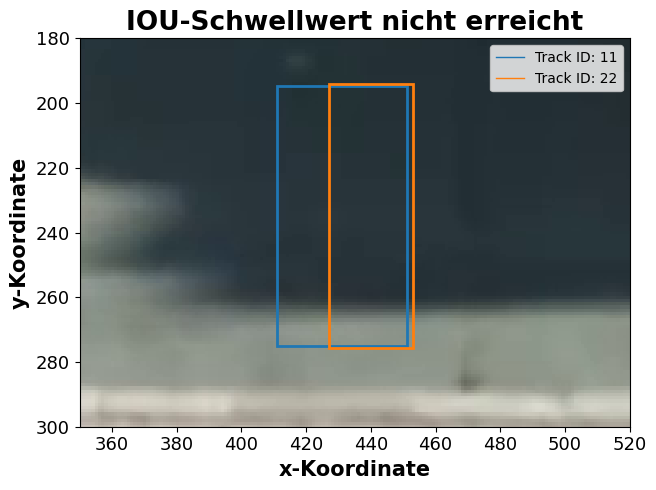

In [5]:
from scripts.plotfunctions import plot_BBoxes

data = OTCdetections[OTCdetections['class'] == 'pedestrian']
data = data[data['frame'] > 122]
data = data[data['frame'] < 125]
# data = data[data['track-id'] > 10]
# data = data[data['track-id'] < 16]

plt.show(plot_BBoxes(data, dirpath, box=box, track_id=11, 
                     framerate=1, 
                     include_trajectories=True,
                     custom_picture_section=[350,520,180,300],
                     include_legend=True,
                     titletext="IOU-Schwellwert nicht erreicht",
                     savename="14_IOU_zu_klein"
                     ))

# plt.show(plot_trajectory(data,
#                          dirpath,
#                          box=box,
#                          fontsize=18,
#                          show_background=True))